In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_percentage_error)
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from astropy.table import Table

In [5]:
def open_fits(filename: str):
    """"
    Open fits file and load it as a pandas dataframe

    :param filename: location of the fits file

    :returns: data, pandas dataframe
    """
    dat = Table.read(filename, format='fits')
    data = dat.to_pandas()

    return data

In [20]:
data = open_fits("../../Data/Fangyou_data/Original/Cigale_input/bootes_cigale.fits")

In [23]:
fluxes = data.drop(columns=["id", "redshift"])

remove_columns_error = [column for column in data.columns if 'err' in column.lower()]
fluxes = fluxes.drop(columns=remove_columns_error)

In [24]:
fluxes.columns

Index(['u_prime', 'NOAO_Bw', 'NOAO_R', 'NOAO_I', 'z_prime', 'SUBARU_z',
       'subaru.hsc.y', 'NEWFIRM_J', 'NEWFIRM_H', 'WFI_K', 'noao.Ks', 'IRAC1',
       'IRAC2', 'IRAC3', 'IRAC4', 'MIPS1', 'herschel.pacs.100',
       'herschel.pacs.160', 'PSW', 'PMW', 'PLW'],
      dtype='object')

In [25]:
fluxes[fluxes==-9999] = np.nan

In [26]:
fluxes.isna().sum()

u_prime              2254
NOAO_Bw               637
NOAO_R                400
NOAO_I                 73
z_prime              4747
SUBARU_z             1934
subaru.hsc.y         1896
NEWFIRM_J             620
NEWFIRM_H             509
WFI_K                8231
noao.Ks               558
IRAC1                   4
IRAC2                   0
IRAC3                 110
IRAC4                 115
MIPS1                1509
herschel.pacs.100     965
herschel.pacs.160     965
PSW                   647
PMW                   647
PLW                   647
dtype: int64

In [47]:
fluxes.dropna()

,u_prime,NOAO_Bw,NOAO_R,NOAO_I,z_prime,SUBARU_z,subaru.hsc.y,NEWFIRM_J,NEWFIRM_H,WFI_K,...,IRAC1,IRAC2,IRAC3,IRAC4,MIPS1,herschel.pacs.100,herschel.pacs.160,PSW,PMW,PLW
18,0.002718,3.017876e-03,0.006535,0.012783,0.015538,0.019816,0.021944,0.029657,0.039297,0.062183,...,0.076377,0.062827,0.042695,0.034208,0.005313,10.354733,8.231767,0.358818,0.255025,0.267217
30,0.012097,2.125861e-02,0.111678,0.168394,0.182001,0.200501,0.221342,0.280646,0.334930,0.384516,...,0.298685,0.309390,0.287150,0.708653,1.153024,17.126108,12.572943,8.643774,2.512472,0.521399
38,0.002801,6.256703e-06,0.007154,0.016446,0.015103,0.019244,0.017668,0.030255,0.035336,0.043781,...,0.060723,0.045382,0.054317,0.046549,0.235766,5.529907,12.886890,5.960359,0.805643,0.401125
44,0.000614,3.072864e-07,0.000196,0.000066,0.007308,0.005544,0.006205,0.010617,0.016748,0.035899,...,0.052075,0.061099,0.062741,0.100374,0.128192,4.756607,16.076624,0.568202,1.041933,0.979398
45,0.000680,5.922559e-04,0.002602,0.006444,0.007222,0.009718,0.012128,0.016206,0.026580,0.045236,...,0.074416,0.068765,0.051965,0.055926,0.019082,3.580406,22.989967,7.249910,4.026084,1.003547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18086,0.005181,8.536980e-03,0.034233,0.048824,0.063209,0.072866,0.083586,0.102247,0.146143,0.147600,...,0.136281,0.119288,0.110811,0.208104,1.208974,34.328293,51.205132,42.408756,9.002818,3.673940
18128,0.001278,9.945749e-04,0.002554,0.005804,0.006944,0.004023,0.007342,0.011153,0.017065,0.011951,...,0.034244,0.032993,0.014349,0.030011,0.037844,3.194973,2.297086,3.049263,1.391866,1.564873
18151,0.000434,8.011308e-04,0.007098,0.013938,0.020798,0.020882,0.021764,0.034607,0.046906,0.036829,...,0.045014,0.032475,0.020462,0.016714,0.050405,2.334136,4.219584,2.612615,2.720769,4.937565
18162,0.001015,1.450232e-03,0.006121,0.014517,0.020502,0.022731,0.024168,0.041569,0.057740,0.077216,...,0.129798,0.118531,0.138414,0.147855,0.839786,21.706520,22.836901,23.934694,19.824219,15.655424


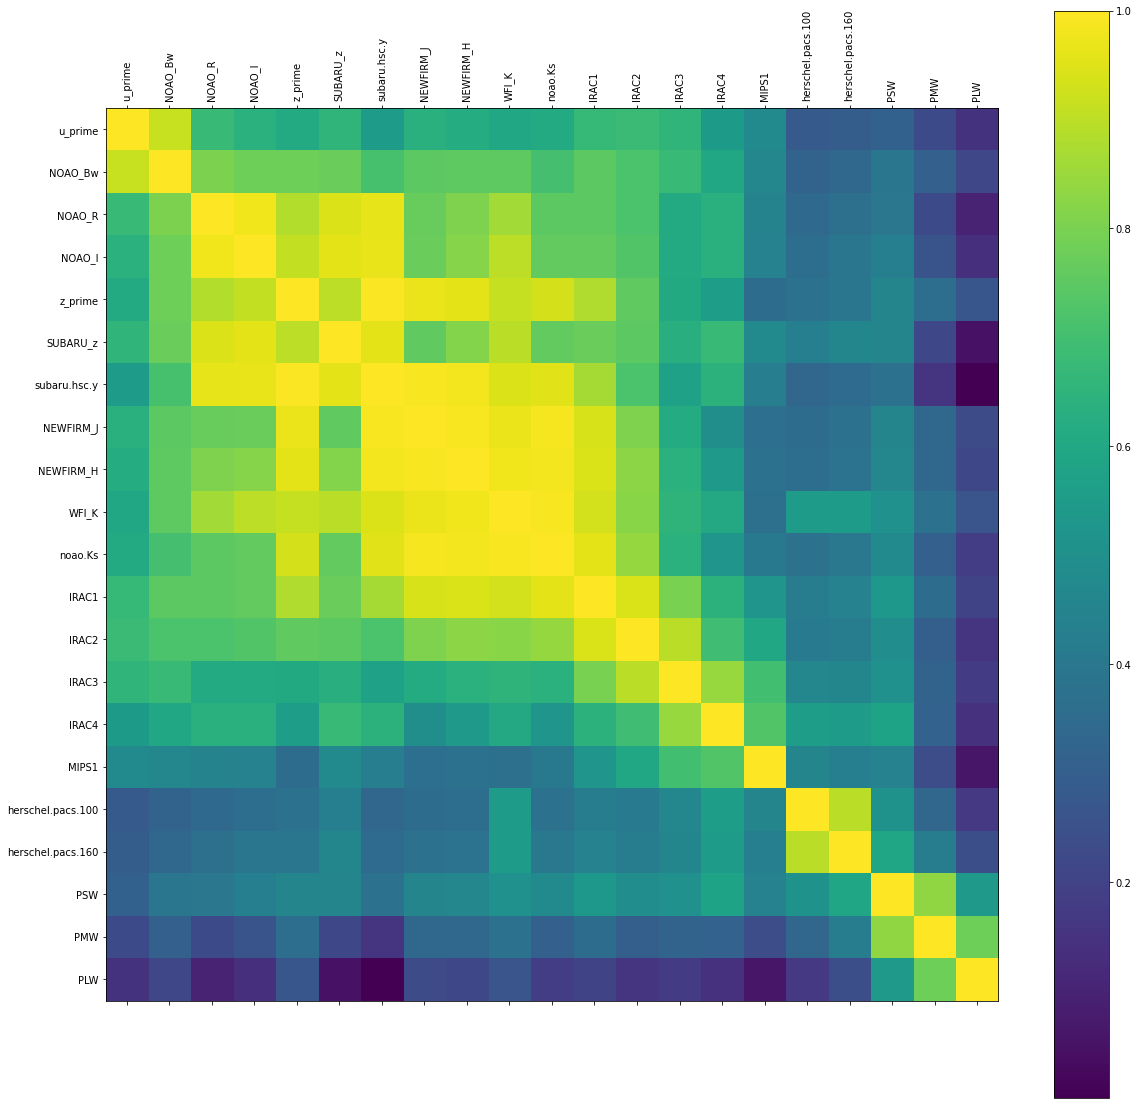

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
corr = fluxes.corr()
corr_plot = ax.matshow(corr)
plt.colorbar(corr_plot)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [43]:
print(corr[column].sort_values(ascending=False)[1:5])

PMW        0.778169
PSW        0.542115
z_prime    0.267953
WFI_K      0.266273
Name: PLW, dtype: float64


In [44]:
for column in fluxes.columns:
    value = corr[column].sort_values(ascending=False)[1:5]
    print(column, ":")
    print(value)
    print("-----------------")

u_prime :
NOAO_Bw    0.917376
IRAC2      0.681264
NOAO_R     0.679540
IRAC1      0.672024
Name: u_prime, dtype: float64
-----------------
NOAO_Bw :
u_prime    0.917376
NOAO_R     0.804845
NOAO_I     0.779432
z_prime    0.779152
Name: NOAO_Bw, dtype: float64
-----------------
NOAO_R :
NOAO_I          0.978923
subaru.hsc.y    0.961463
SUBARU_z        0.947586
z_prime         0.886565
Name: NOAO_R, dtype: float64
-----------------
NOAO_I :
NOAO_R          0.978923
subaru.hsc.y    0.966248
SUBARU_z        0.959954
z_prime         0.907102
Name: NOAO_I, dtype: float64
-----------------
z_prime :
subaru.hsc.y    0.994384
NEWFIRM_J       0.968982
NEWFIRM_H       0.959157
noao.Ks         0.936421
Name: z_prime, dtype: float64
-----------------
SUBARU_z :
NOAO_I          0.959954
subaru.hsc.y    0.958012
NOAO_R          0.947586
z_prime         0.900623
Name: SUBARU_z, dtype: float64
-----------------
subaru.hsc.y :
z_prime      0.994384
NEWFIRM_J    0.991230
NEWFIRM_H    0.983429
NOAO_I       

Index(['FUV_flux_corr', 'NUV_flux_corr', 'u_flux_corr', 'Bw_flux_corr',
       'R_flux_corr', 'I_flux_corr', 'z_flux_corr', 'z_Subaru_flux_corr',
       'y_flux_corr', 'J_flux_corr', 'H_flux_corr', 'K_flux_corr',
       'Ks_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr',
       'ch4_flux_corr', 'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250',
       'F_SPIRE_350', 'F_SPIRE_500', 'g_flux_corr', 'r_flux_corr',
       'i_flux_corr', 'g_hsc_flux_corr', 'r_hsc_flux_corr', 'i_hsc_flux_corr',
       'z_hsc_flux_corr', 'y_hsc_flux_corr', 'nb921_hsc_flux_corr',
       'ch1_swire_flux_corr', 'ch2_swire_flux_corr', 'ch3_swire_flux_corr',
       'ch4_swire_flux_corr', 'ch1_servs_flux_corr', 'ch2_servs_flux_corr',
       'g_rcs_flux_corr', 'r_rcs_flux_corr', 'i_rcs_flux_corr',
       'z_rcs_flux_corr'],
      dtype='object')

In [7]:
def evaluate_model(model, test_features, test_labels):
    """Return the metrics of the predictions"""
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = mean_absolute_percentage_error(test_labels, predictions)
    rmse = mean_squared_error(test_labels, predictions, squared=False)
    r2_score = model.score(test_features, test_labels)
    print('Model Performance %s' % model)
    print('Average Error: {:0.5f}'.format(np.mean(errors)))
    print('RMSE = {:0.5f}'.format(rmse))
    print('MAPE = {:0.5f}%'.format(mape*100))
    print('R^2 = {:0.5f}'.format(r2_score))

In [48]:
dat = fluxes[["FUV_flux_corr", "NUV_flux_corr"]].dropna()
X = dat["NUV_flux_corr"]
y = dat["FUV_flux_corr"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

reg = LinearRegression().fit(X_train, y_train)
evaluate_model(reg, X_test, y_test)

Model Performance LinearRegression()
Average Error: 0.03714
RMSE = 0.16125
MAPE = 50.85805%
R^2 = 0.99891


In [64]:
dat = fluxes[["r_hsc_flux_corr", "g_flux_corr"]].dropna()
X = dat["r_hsc_flux_corr"]
y = dat["g_flux_corr"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

reg = LinearRegression().fit(X_train, y_train)
evaluate_model(reg, X_test, y_test)
print(reg.coef_, reg.intercept_)

Model Performance LinearRegression()
Average Error: 1.62553
RMSE = 4.67187
MAPE = 195.98791%
R^2 = 0.94910
[0.46913531] -0.4075087825189696


In [66]:
dat = fluxes[["r_hsc_flux_corr", "g_hsc_flux_corr"]].dropna()
X = dat["r_hsc_flux_corr"]
y = dat["g_hsc_flux_corr"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

reg = LinearRegression().fit(X_train, y_train)
evaluate_model(reg, X_test, y_test)
print(reg.coef_, reg.intercept_)

Model Performance LinearRegression()
Average Error: 1.67103
RMSE = 5.55053
MAPE = 98.71049%
R^2 = 0.95081
[0.48875252] -0.2372621352858113


Model Performance LinearRegression()
Average Error: 0.03714
RMSE = 0.16125
MAPE = 50.85805%
R^2 = 0.99891


In [12]:
reg.coef_, reg.intercept_

(array([1.5531972]), 0.013755518325643479)

In [39]:
dat = fluxes[["z_Subaru_flux_corr", "z_flux_corr"]].dropna()
z_sub = dat["z_Subaru_flux_corr"]
z = dat["z_flux_corr"]

X_train, X_test, y_train, y_test = train_test_split(z, z_sub, test_size=0.2, random_state=42)

X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

evaluate_model(reg, X_test, y_test)

Model Performance LinearRegression()
Average Error: 25.67615
RMSE = 52.52109
MAPE = 44602575.63505%
R^2 = 0.35557


In [46]:
sum(np.abs(z-z_sub)>5)

1558

In [47]:
corr

,FUV_flux_corr,NUV_flux_corr,u_flux_corr,Bw_flux_corr,R_flux_corr,I_flux_corr,z_flux_corr,z_Subaru_flux_corr,y_flux_corr,J_flux_corr,...,ch1_swire_flux_corr,ch2_swire_flux_corr,ch3_swire_flux_corr,ch4_swire_flux_corr,ch1_servs_flux_corr,ch2_servs_flux_corr,g_rcs_flux_corr,r_rcs_flux_corr,i_rcs_flux_corr,z_rcs_flux_corr
FUV_flux_corr,1.000000,0.999212,0.700935,0.524596,0.481551,0.478581,0.325999,0.471479,0.325249,0.333108,...,0.207858,0.172924,0.144606,0.253711,0.431799,0.463118,0.556503,0.410078,0.326510,0.303459
NUV_flux_corr,0.999212,1.000000,0.736146,0.839083,0.613601,0.536697,0.325448,0.480421,0.341902,0.334170,...,0.204079,0.169900,0.141939,0.249227,0.430866,0.462690,0.549555,0.403496,0.320722,0.297575
u_flux_corr,0.700935,0.736146,1.000000,0.929426,0.693090,0.629688,0.557284,0.565046,0.586947,0.614292,...,0.418188,0.320892,0.260694,0.422163,0.643900,0.671060,0.818137,0.732686,0.601706,0.605287
Bw_flux_corr,0.524596,0.839083,0.929426,1.000000,0.821411,0.767713,0.461965,0.689799,0.640755,0.680839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_flux_corr,0.481551,0.613601,0.693090,0.821411,1.000000,0.988448,0.603357,0.940531,0.916460,0.735385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I_flux_corr,0.478581,0.536697,0.629688,0.767713,0.988448,1.000000,0.617227,0.954944,0.940603,0.729819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z_flux_corr,0.325999,0.325448,0.557284,0.461965,0.603357,0.617227,1.000000,0.563708,0.821125,0.860838,...,0.625099,0.421547,0.291785,0.478408,0.904295,0.807330,0.904582,0.976625,0.940124,0.988586
z_Subaru_flux_corr,0.471479,0.480421,0.565046,0.689799,0.940531,0.954944,0.563708,1.000000,0.908125,0.729596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y_flux_corr,0.325249,0.341902,0.586947,0.640755,0.916460,0.940603,0.821125,0.908125,1.000000,0.824141,...,0.912601,0.796751,0.632615,0.575589,0.913005,0.820320,NaN,NaN,NaN,NaN
J_flux_corr,0.333108,0.334170,0.614292,0.680839,0.735385,0.729819,0.860838,0.729596,0.824141,1.000000,...,0.652374,0.449265,0.317677,0.481280,0.924184,0.822489,0.864352,0.922229,0.887954,0.962245
